In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Using plotly.express
import plotly.express as px
from pylab import rcParams
from IPython.display import IFrame

In [2]:
data = pd.read_excel('Dataset.xls',sheet_name='Data')

In [3]:
data

,Date,Sales
0,1995-01-01,1463.9
1,1995-02-01,1373.3
2,1995-03-01,1533.7
3,1995-04-01,1420.6
4,1995-05-01,1576.3
...,...,...
175,2009-08-01,3467.7
176,2009-09-01,3406.1
177,2009-10-01,3641.3
178,2009-11-01,3787.3


In [4]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data['month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
sales_monthly_df = data.groupby('month')['Sales'].mean().to_frame()

data = data.set_index('Date')

In [5]:
fig = px.line(data, x=data.index, y='Sales')
fig.write_html("default_plot.html")
IFrame(src='./default_plot.html', width=1000, height=600)

In [6]:
data

,Sales,month,Year
Date,,,
1995-01-01,1463.9,1,1995
1995-02-01,1373.3,2,1995
1995-03-01,1533.7,3,1995
1995-04-01,1420.6,4,1995
1995-05-01,1576.3,5,1995
...,...,...,...
2009-08-01,3467.7,8,2009
2009-09-01,3406.1,9,2009
2009-10-01,3641.3,10,2009


## Trendline

  ** We are grouping Sales data per month for each year ** 

In [7]:
fig = px.scatter(data, x=data.index, y="Sales", facet_col="month", color="Year", trendline="ols", title='Monthly trendline spread over all the years')
fig.write_html("monthly_trendline.html")

In [8]:
IFrame(src='./monthly_trendline.html', width=1000, height=600)

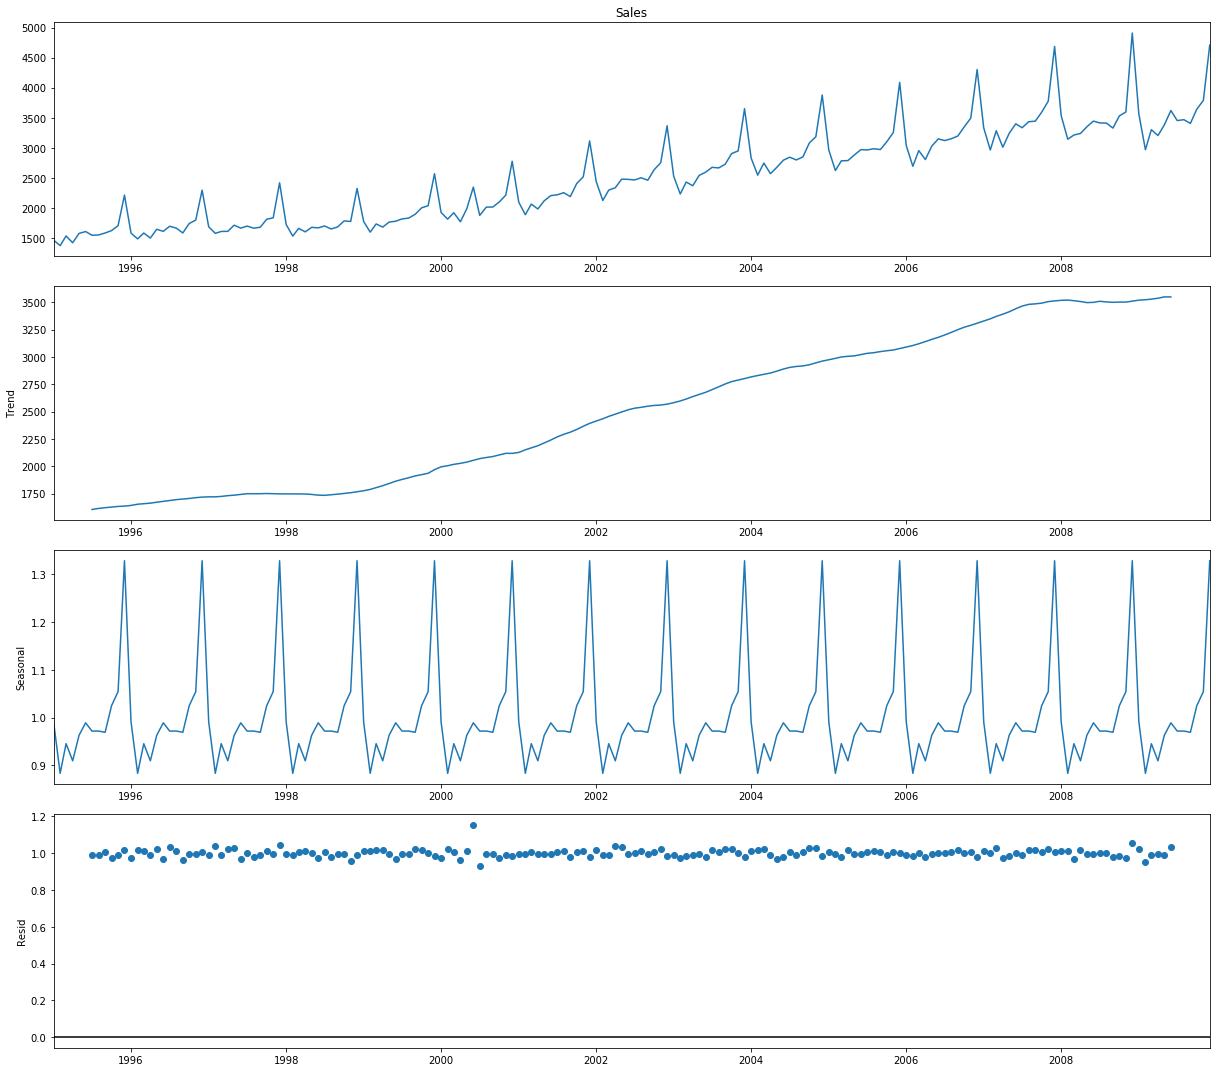

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data.Sales,  model='multiplicative')
rcParams['figure.figsize'] = 17, 15
result.plot()
plt.show()

In [10]:
result.seasonal

Date
1995-01-01    0.990940
1995-02-01    0.883305
1995-03-01    0.945254
1995-04-01    0.909484
1995-05-01    0.962804
                ...   
2009-08-01    0.971734
2009-09-01    0.969122
2009-10-01    1.024510
2009-11-01    1.054249
2009-12-01    1.328005
Name: seasonal, Length: 180, dtype: float64

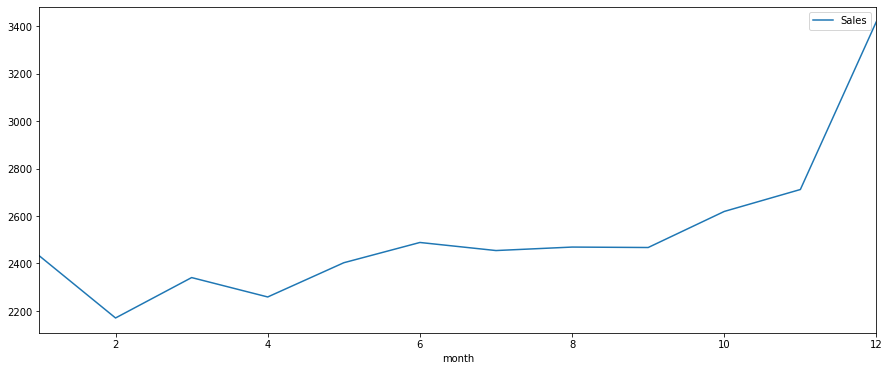

In [11]:
rcParams['figure.figsize'] = 15, 6
sales_monthly_df.plot()

In [12]:
# prepare data
from sklearn.metrics import mean_squared_error
from math import sqrt

X = data.Sales.values
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# predict
	yhat = history[-1]
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
	#print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

RMSE: 420.049


* In this case, we can see that the persistence model achieved an RMSE of *420.049*. This means that on average, the model was wrong by about **420.049 sales unit for each prediction made.** *

In [13]:
data['Sales'].describe()

count     180.000000
mean     2519.532778
std       767.485037
min      1373.300000
25%      1775.850000
50%      2476.800000
75%      3126.025000
max      4908.600000
Name: Sales, dtype: float64

In [14]:
import scipy.stats
scipy.stats.describe(data['Sales'], ddof=1, bias=False)

DescribeResult(nobs=180, minmax=(1373.3, 4908.6), mean=2519.5327777777775, variance=589033.2822157047, skewness=0.4916487198968919, kurtosis=-0.365284898943103)

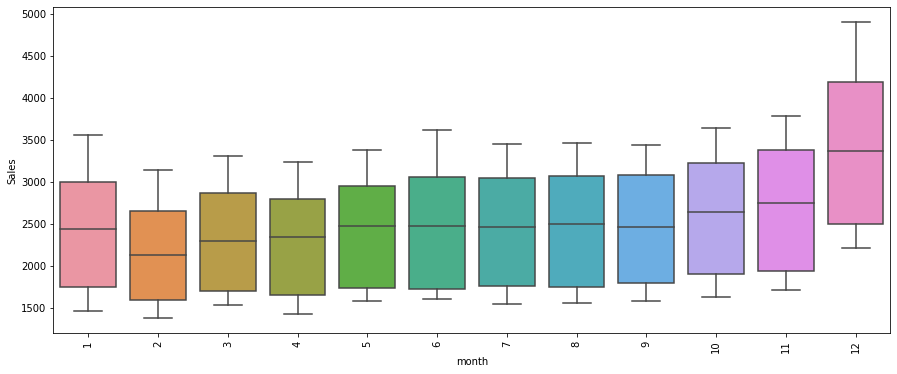

In [15]:
#df['Year'] = df.index.year
import seaborn as sns
ax = sns.boxplot(data = data, x='month',y=data['Sales'])
for item in ax.get_xticklabels():
    item.set_rotation(90)

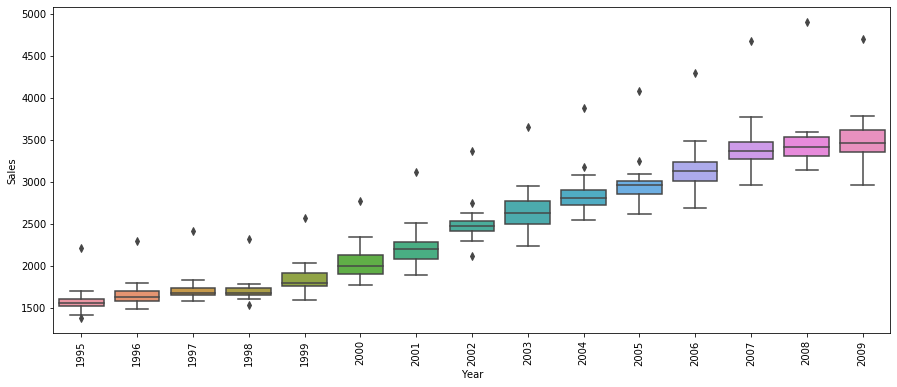

In [16]:
#df['Year'] = df.index.year
import seaborn as sns
ax = sns.boxplot(data = data, x=data['Year'],y=data['Sales'])
for item in ax.get_xticklabels():
    item.set_rotation(90)

In [17]:
result.seasonal.to_frame()

,seasonal
Date,
1995-01-01,0.990940
1995-02-01,0.883305
1995-03-01,0.945254
1995-04-01,0.909484
1995-05-01,0.962804
...,...
2009-08-01,0.971734
2009-09-01,0.969122
2009-10-01,1.024510


- https://machinelearningmastery.com/time-series-forecast-study-python-monthly-sales-french-champagne/

- https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

## Session II: Using Data for UK

In [30]:
data_2 = pd.read_excel('Dataset2.xls',sheet_name='Data')

In [34]:
data_2

,SALES,month,Year
DATE,,,
1997-01-01,1931.328,1,1997
1997-02-01,1883.981,2,1997
1997-03-01,2350.960,3,1997
1997-04-01,1881.568,4,1997
1997-05-01,1862.032,5,1997
...,...,...,...
2011-08-01,2214.104,8,2011
2011-09-01,2826.302,9,2011
2011-10-01,2433.236,10,2011


In [32]:
data_2['DATE'] = pd.to_datetime(data_2['DATE'], format='%Y-%m-%d')
data_2['month'] = data_2['DATE'].dt.month
data_2['Year'] = data_2['DATE'].dt.year
sales_monthly_df_2 = data_2.groupby('month')['SALES'].mean().to_frame()

data_2 = data_2.set_index('DATE')

In [33]:
fig = px.line(data, x=data.index, y='Sales')
fig.write_html("default_plot_uk.html")
IFrame(src='./default_plot_uk.html', width=1000, height=600)

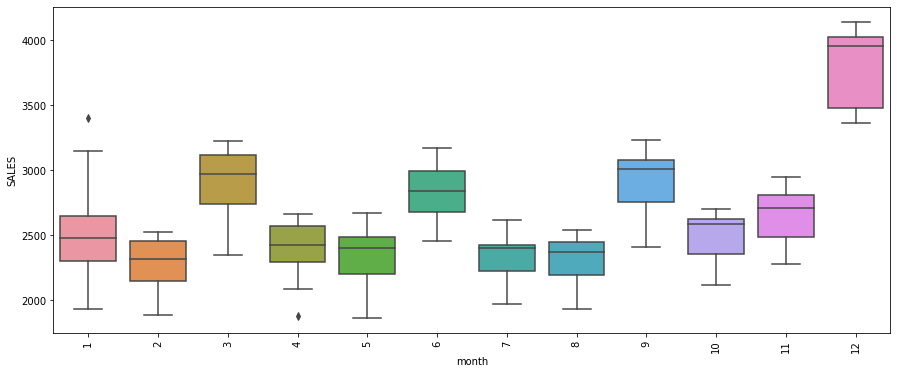

In [35]:
ax1 = sns.boxplot(data = data_2, x='month',y=data_2['SALES'])
for item in ax1.get_xticklabels():
    item.set_rotation(90)

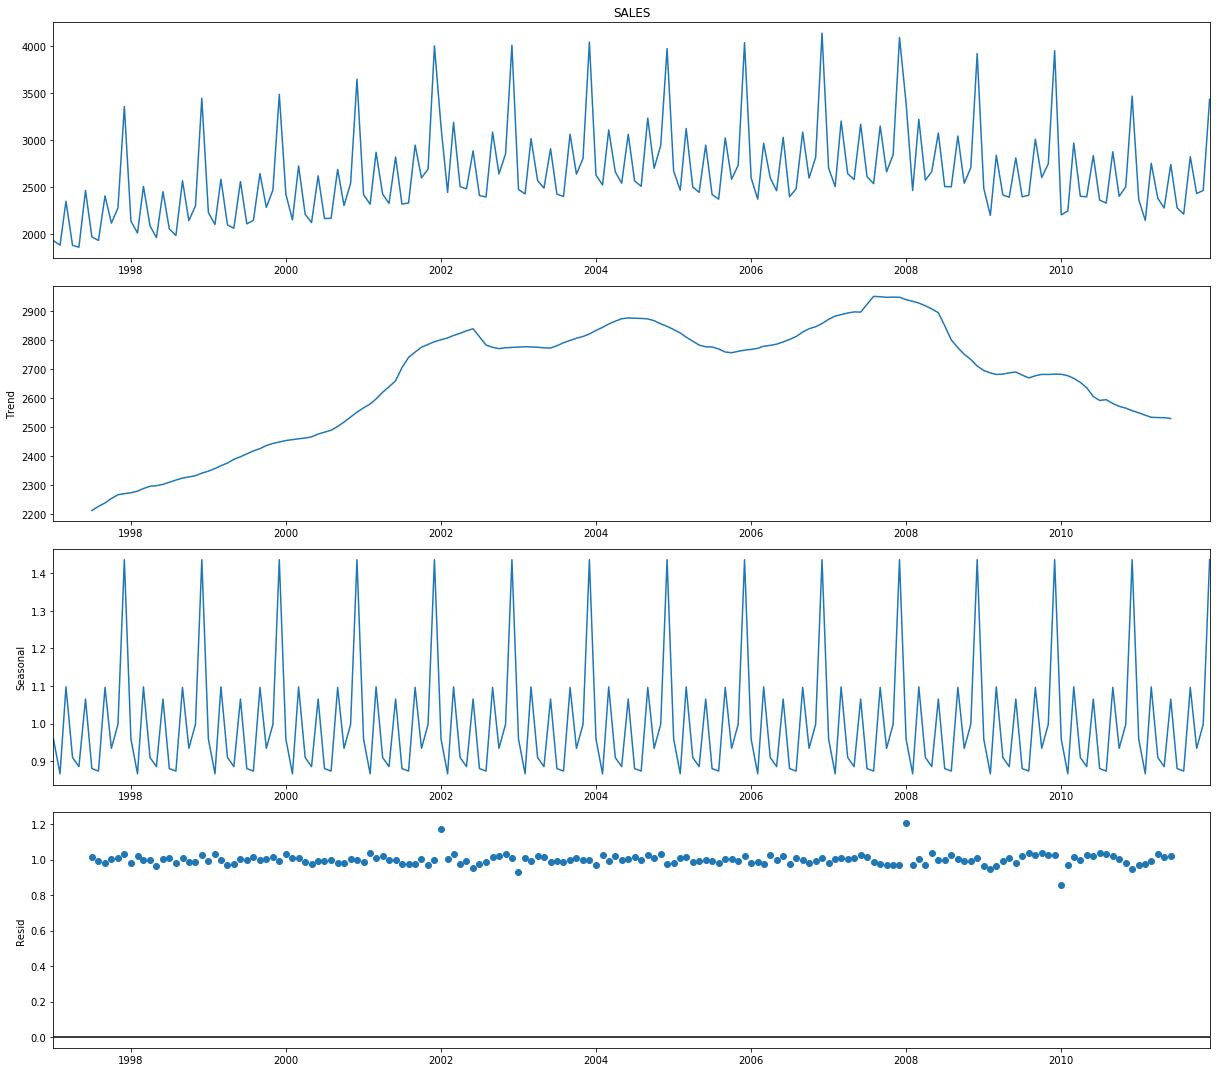

In [36]:
result2 = seasonal_decompose(data_2.SALES,  model='multiplicative')
rcParams['figure.figsize'] = 17, 15
result2.plot()
plt.show()

## Using Annova Test

We will try to use Annova test to see if there's a differrence between the two markets (Australian) and (UK)

- Anova is called Analysis of Variance Test. 

<img src="./annova_cartoon.jpg" />

In [40]:
import scipy.stats as stats
stats.f_oneway(data['Sales'], data_2['SALES'])

F_onewayResult(statistic=3.639188108255176, pvalue=0.0572343407178443)

In [41]:
stats.ttest_ind(data['Sales'], data_2['SALES'])

Ttest_indResult(statistic=-1.9076656175166502, pvalue=0.05723434071783936)